# Homework1
#### Ali Arous

### Exercise 2:
**Write code to generate random numbers following a N(0, 1) distribution by the acceptance-rejection method, using a $\operatorname{Laplace}(\alpha)$ distribution as the candidate distribution, following Exercise 4 in the Simulation 03 Notebook. Evaluate the efficiency (acceptance rate) of the method.**

A code for RNG to generate $\operatorname{Laplace}(\alpha)$-distributed random numbers by the inverse cdf method:

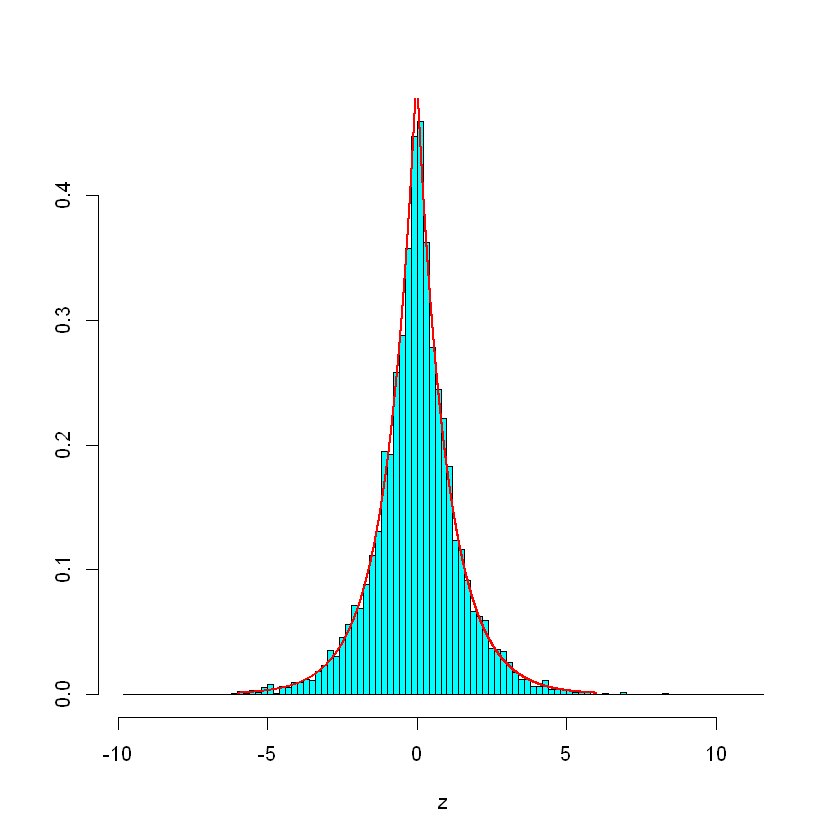

In [6]:
require(MASS)
require(extraDistr)
my.rlaplace<-function(n, alpha=1){
    y = runif(n)
    return (ifelse(y <0.5, (1/alpha)*log(2*y), (-1/alpha)*(log(2*(1-y)))))    
}
n = 1.0e4
z = my.rlaplace(n)
truehist(z)
x<-seq(-6,6,length=n)
lines(x,dlaplace(x), col='red', lwd=2)

Code for acceptance-rejection algorithm:

In [9]:
Accept.Reject<-function(f,g,rg,c,n=1.0e4){
    z<-rep(0,n) 
    N<-0
    for (i in 1:n){
        accept<-FALSE
        while (accept == FALSE){
            u <- runif(1)
            v <- rg(1)
            N<-N+1
            if (c*u <= f(v)/g(v)){
                z[i] <- v
                accept <- TRUE
                }
            }
        }
    Proportion<-n/N
    return(list(z=z,Proportion=Proportion))
}

After following the steps of Simulation 3 notebook, we find the suitable values $α$  and the proportion  $M$ (synonym to $c$)  for the acceptance-rejection algorithm as: $α = 1$,     $M=1.315489$

**Code for implementing the following steps:**
1. Generating a sequence of  N(0,1)-distributed random numbers with the acceptance-rejection algorithm, using a  Laplace(α=1) candidate pdf and proportionality constant  M=1.315489 . Use several sample sizes  n .

2. Plotting a histogram of the resulting numbers. Superimposing to it the  N(0,1)  pdf.

3. Evaluating the acceptance rate from the theoretical formula and checking that the actual observed proportion of accepted values approaches this value for large  n .

[1] "For n =  100"
[1] "Acceptance rate: Theoritical =  0.760173593241753 , Observed =  0.769230769230769"


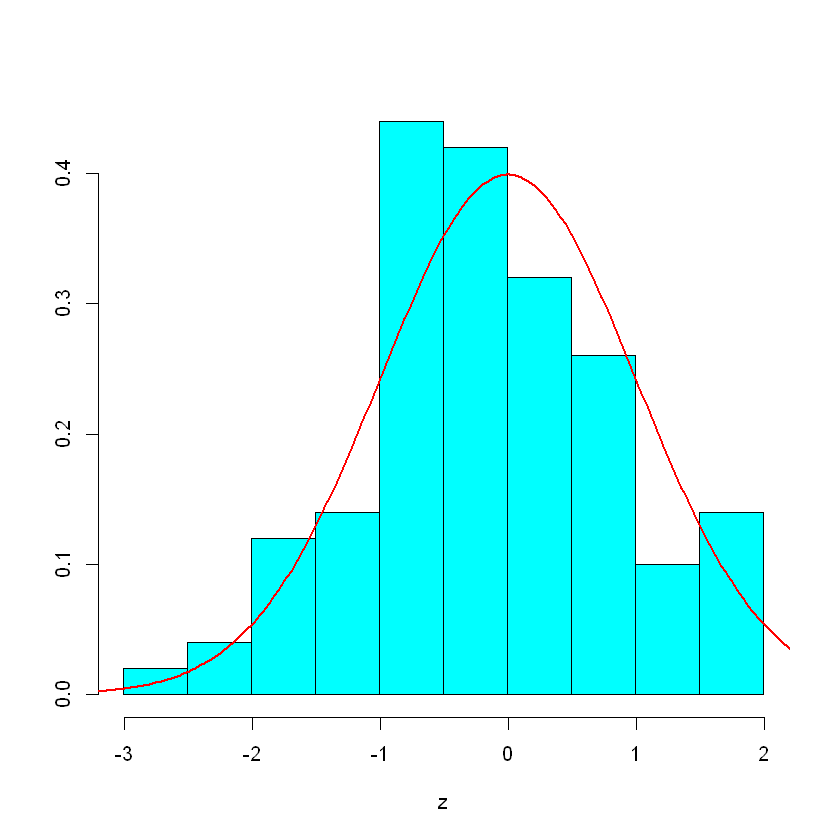

[1] "For n =  1000"
[1] "Acceptance rate: Theoritical =  0.760173593241753 , Observed =  0.769822940723634"


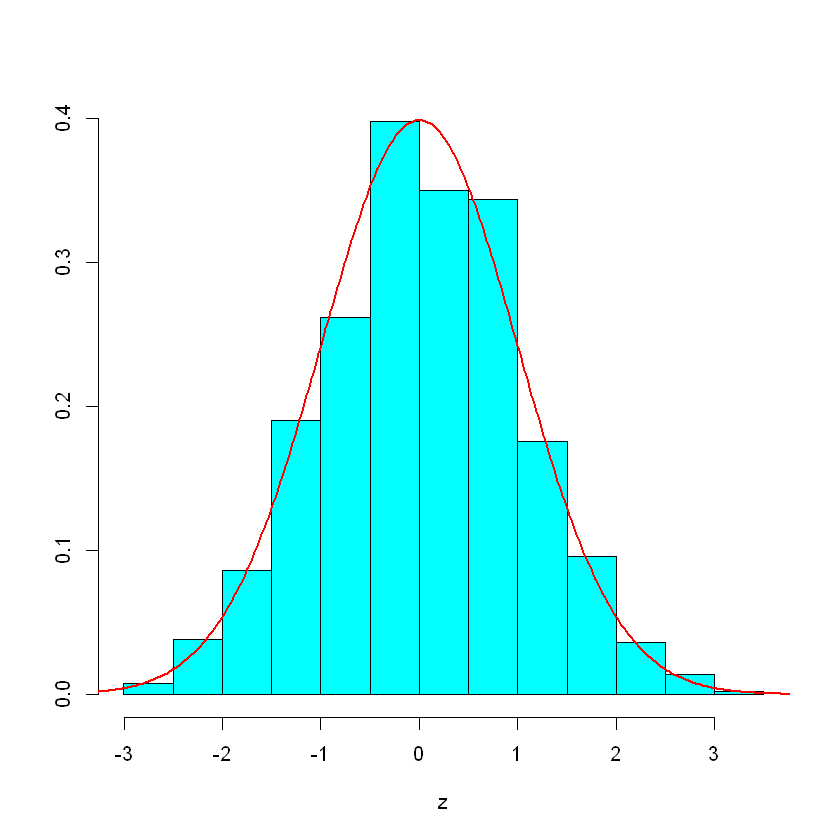

[1] "For n =  10000"
[1] "Acceptance rate: Theoritical =  0.760173593241753 , Observed =  0.754716981132076"


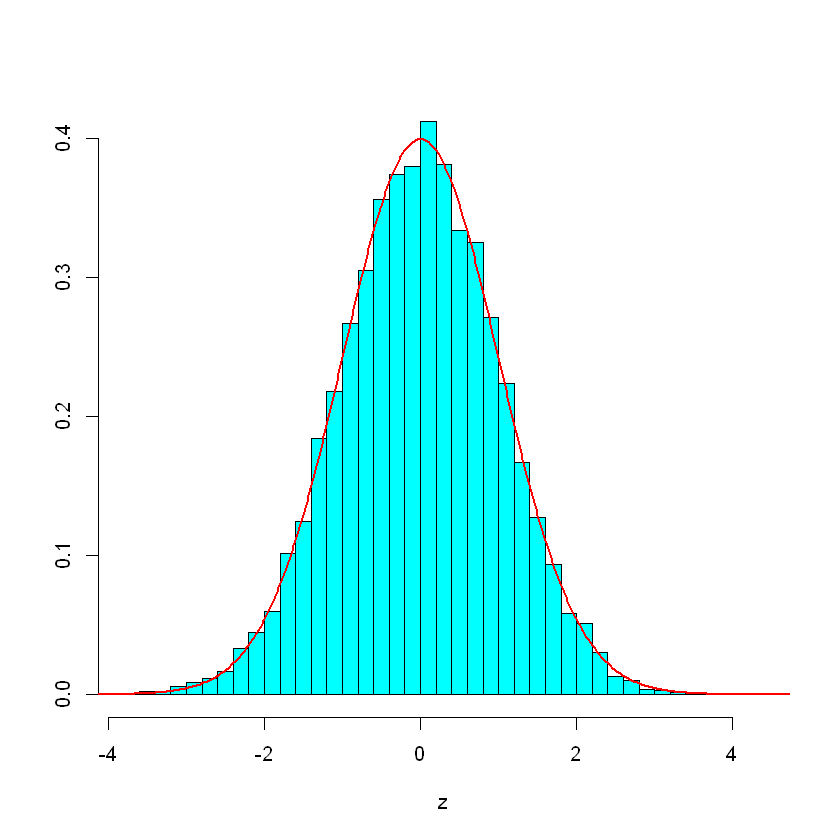

[1] "For n =  1e+05"
[1] "Acceptance rate: Theoritical =  0.760173593241753 , Observed =  0.7605256753468"


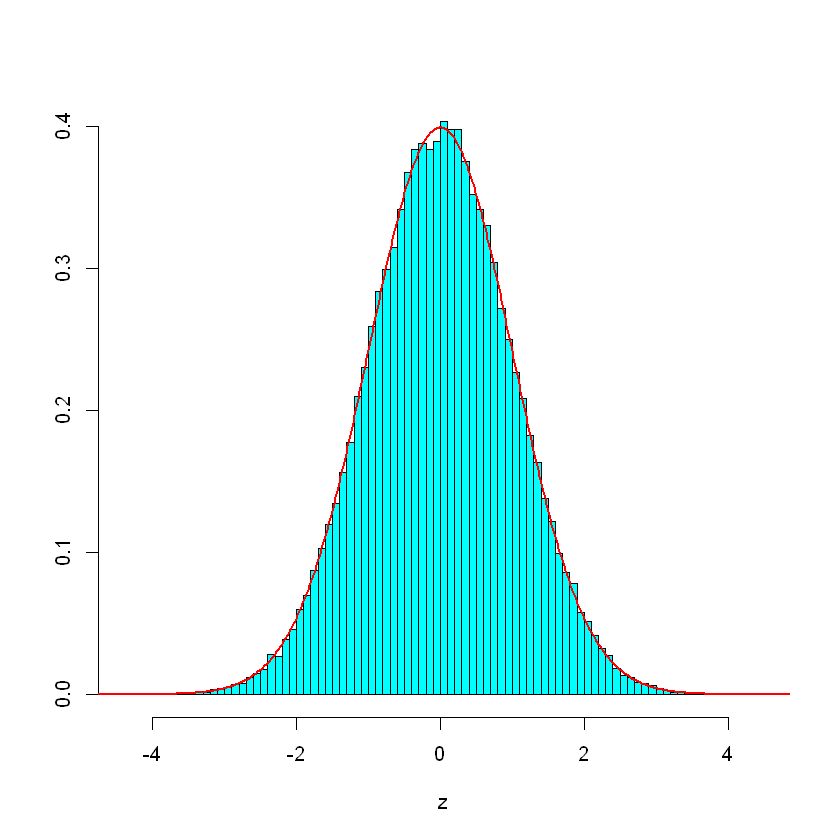

In [13]:
sample_sizes = c(1.0e2, 1.0e3, 1.0e4, 1.0e5)
M<-1.315489
for (n in sample_sizes){
    results = Accept.Reject(f=dnorm, g=dlaplace, rg=my.rlaplace, c=M, n)
    z = results$z

    truehist(z)
    
    x<-seq(-6,6,length=500)
    lines(x,dnorm(x), col='red', lwd=2)
    
    acc=results$Proportion
    
    print(paste("For n = ", n))
    print(paste("Acceptance rate: Theoritical = ", 1/M, ", Observed = ", acc))
}

As we have seen in the previous histograms and values of acceptance rate for n = 100, 1000, 10000, 10000.
We conclude that the actual observed proportion of accepted values approaches the acceptance rate from the theoretical formula for large n .

### Exercise 3:
**Further computations with the placenta previa exercise**

### 3.1

Compute the posterior pdf, and both prior and posterior predictor pmf for the placenta previa problem, using a conjugate $\mbox{Beta}(\alpha,\beta)$ prior, for several values of the parameters, obtaining for each of them a 95% (centered) credible interval and the MAP and posterior expectation estimators of $\theta$. In particular, reproduce Figure 2.3 and Table 2.1 in BDA3. Do the same for those $\alpha_0$ and $\beta_0$ such that $\mbox{Beta}(\alpha_0,\beta_0)$ has the same expectation and variance than the piecewise linear nonconjugate prior. Compare the posterior quantities with both priors. 

In [1]:
# we compute the values of a and b from the given a/(a+b) and (a+b) in table 2.1 in BDA3
p <- c(0.5, 0.485, 0.485, 0.485, 0.485, 0.485, 0.485)
t <- c(2, 2, 5, 10, 20, 100, 200)

alpha = p*t
beta = (1-p)*t

# we computed the corresponding a0 and b0 on paper and found out that:
a0 = 2.301237
b0 = 2.366586

# we update our vectors
alpha = c(alpha, a0)
beta  = c(beta, b0)

show<-data.frame(alpha = alpha,beta = beta)
(show)

alpha,beta
1.000000,1.000000
0.970000,1.030000
2.425000,2.575000
4.850000,5.150000
9.700000,10.300000
48.500000,51.500000
97.000000,103.000000
2.301237,2.366586


In [8]:
require(extraDistr)
N<-1000
n<-980
n1<-437

dmode <- function(x) {
  dx <- density(x)
  dx$x[which.max(dx$y)]
} 


range=length(alpha)-1
a = alpha
b = beta

ci_lowerbound=seq(0,range)
ci_upperbound=seq(0,range)
map=seq(0, range)
median=seq(0, range)
expectation=seq(0, range)

for (i in 1:range){
    posterior<- rbeta(N,a[i]+n1,b[i]+n-n1)
    prior_predictor<- rbbinom(N, n, a[i], b[i])
    posterior_predictor<- rbbinom(N, n, a[i]+n1, b[i]+n-n1)
    
    q<-quantile(posterior, probs=c(0.025,0.975))
    ci_lowerbound[i]=q[1]
    ci_upperbound[i]=q[2]
    
    median[i] = median(sort(posterior))
    map[i] = dmode(posterior)
    expectation[i] = (a[i]+n1) / (a[i]+b[i]+n)
}
# (length(median))
show<-data.frame(
a_over_a_plus_b = round((alpha+beta)/2,3), a_plus_b = round(alpha+beta,3), median_of_theta=round(median,3), lower_bound = round(ci_lowerbound,3), upper_bound = round(ci_upperbound,3), MAP = round(map,3)
)
colnames(show)<-c("$\\frac{\\alpha}{\\alpha + \\beta}$","$\\alpha+\\beta$","Posterior  median of $\\theta$","Lower bound of 95% interval for $\\theta$","Upper bound of 95% interval for $\\theta$","MAP")
(show)

$\frac{\alpha}{\alpha + \beta}$,$\alpha+\beta$,Posterior median of $\theta$,Lower bound of 95% interval for $\theta$,Upper bound of 95% interval for $\theta$,MAP
1.000,2.000,0.445,0.414,0.477,0.447
1.000,2.000,0.446,0.414,0.477,0.445
2.500,5.000,0.447,0.415,0.477,0.451
5.000,10.000,0.447,0.417,0.477,0.448
10.000,20.000,0.448,0.416,0.479,0.449
50.000,100.000,0.450,0.422,0.480,0.450
100.000,200.000,0.452,0.425,0.480,0.454
2.334,4.668,7.000,7.000,7.000,7.000


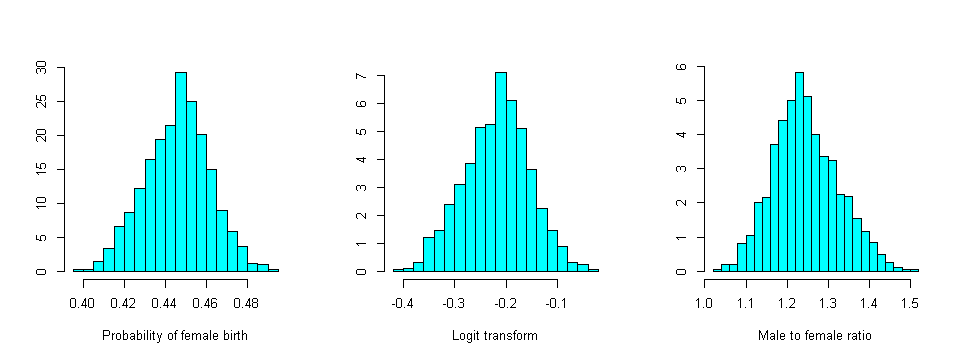

In [13]:
logit <- function(p){log(p/(1-p))}
ratio <- function(p){(1-p)/p}
require(MASS)
options(repr.plot.width=8, repr.plot.height=3)
par(mfrow=c(1,3))
posterior<- rbeta(1000,438,544)
truehist(posterior, xlab = "Probability of female birth")
truehist(logit(posterior), xlab = "Logit transform")
truehist(ratio(posterior), xlab = "Male to female ratio")

### 3.2

Simulate the prior predictive pmf with the nonconjugate piecewise linear pdf. Do it in both possible ways: (1) Sample from $h$ by the inverse transformation method and (2) Sample from its discretization. 

Summarize the resulting simulated sample: plot the empirical pmf, compute median, mode, expectation, standard deviation. Compare the results with those obtained from the conjugate prior $\mbox{Beta}(\alpha_0,\beta_0)$. 

Warning message in sqrt(100 * u - 19):
"NaNs produced"Warning message in sqrt(159 - 200 * u):
"NaNs produced"

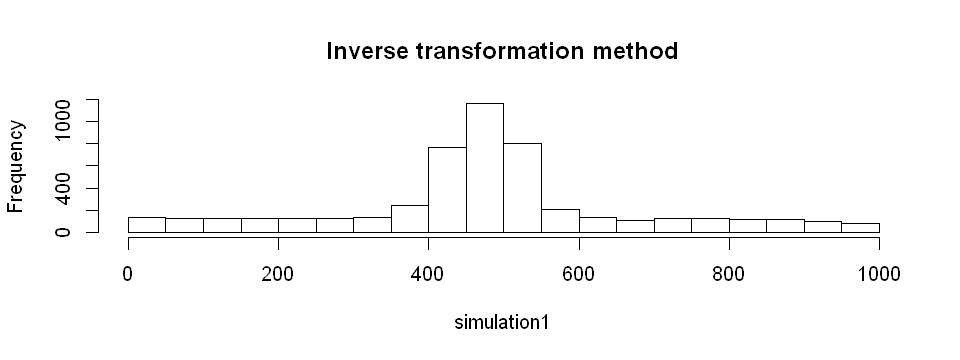

In [20]:
my.rtriang<-function(n){
    u<-runif(n)
    randoms<-ifelse( u<0.1925, 2*u,ifelse( u<0.4925, 0.375 + 0.02*sqrt(100*u-19), ifelse( u<0.7925, 0.595 - 0.0141421*sqrt(159-200*u), 2*u-1 )))
    return(randoms)
}

N = 5000
u<-seq(0,1,length=N)
simulation1<-rbinom(N, n, my.rtriang(u))
hist(simulation1,main="Inverse transformation method")

In [22]:
print(paste("median: ", median(simulation1)))
print(paste("mode  : ", dmode(simulation1)))
print(paste("expect: ", mean(simulation1)))
print(paste("std   : ", sd(simulation1)))

[1] "median:  476"
[1] "mode  :  476.328050339433"
[1] "expect:  477.8656"
[1] "std   :  199.308661942187"


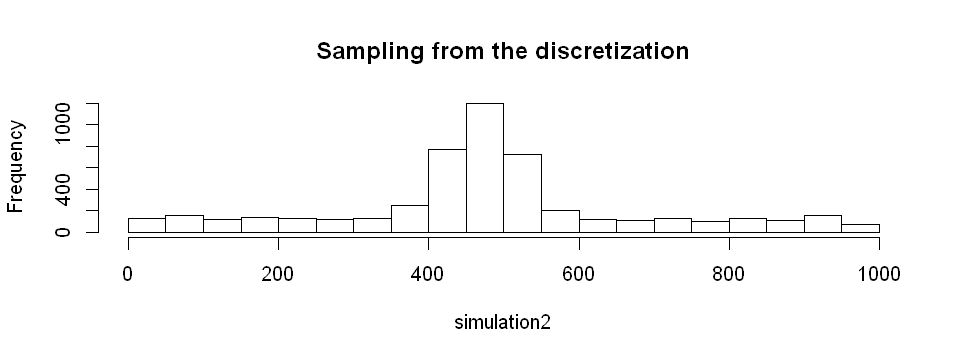

In [28]:
h<-function(t){   
    m<-0.485;c<-0.1;a<-0.5;b<-5.0;A<-a+b-(b*m)/c;B<-b+a+(b*m)/c    
    if ((0<=t & t<m-c) | (m+c<t & t<=1)) {
        return(a)
    } else if (m-c<=t & t<=m) { return(A+b*t/c) }  else if (m<=t & t<=m+c) { return(B-b*t/c) }
    return(0)    
}

t<-seq(0,1,length=N)
t<-t[-N]
prob<-lapply(t,function(a){h(a)/N})
sampling <- sample(t, size = N, replace = TRUE, prob = prob)
simulation2 <- rbinom(N, n, sampling)
hist(simulation2,main="Sampling from the discretization")

In [29]:
print(paste("median: ", median(simulation2)))
print(paste("mode  : ", dmode(simulation2)))
print(paste("expect: ", mean(simulation2)))
print(paste("std   : ", sd(simulation2)))

[1] "median:  473"
[1] "mode  :  472.109092856604"
[1] "expect:  477.7044"
[1] "std   :  204.071264113317"


Compared with the conjugate prior $\mbox{Beta}(\alpha_0,\beta_0)$:

In [31]:
simulation3 <- rbbinom(N, n, a0, b0)

print(paste("median: ", median(simulation3)))
print(paste("mode  : ", dmode(simulation3)))
print(paste("expect: ", mean(simulation3)))
print(paste("std   : ", sd(simulation3)))

[1] "median:  480"
[1] "mode  :  519.052041162212"
[1] "expect:  481.2384"
[1] "std   :  207.716888159257"


### 3.3

Simulate the posterior predictive pmf (given the observed data of 437 female births from 980 placenta previa births) with the nonconjugate piecewise linear pdf. Sample from the the discretization of the posterior pdf as in Exercise 2.

Summarize the resulting simulated sample: plot the empirical pmf, compute median, mode, expectation, standard deviation. Compare the results with those obtained from the conjugate prior $\mbox{Beta}(\alpha_0,\beta_0)$.

Warning message in if ((0 <= t & t < m - c) | (m + c < t & t <= 1)) {:
"the condition has length > 1 and only the first element will be used"

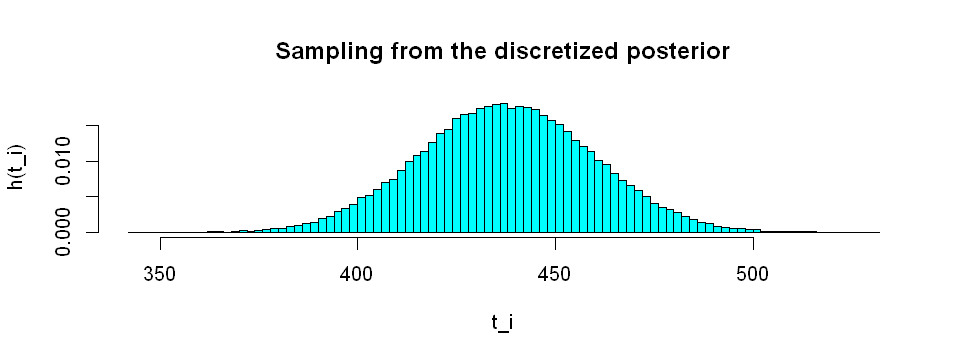

In [34]:
n<-980
x<-437
N1<-1000
t<-seq(0,1,length=N1)
t<-t[-N]
N = 100000

Likelihood <- function(x,theta,n){theta^x*(1-theta)^(n-x)}
nnpost <- Likelihood(x,t,n)*h(t)
dpost<-nnpost/sum(nnpost)
probs <- 1/N1*dpost
discrete_posterior = sample(t, size = N, replace = TRUE, prob = probs)
discrete_post_predictive<-rbinom(N, n, discrete_posterior)

truehist(discrete_post_predictive, xlab = "t_i", ylab = "h(t_i)",
         main = "Sampling from the discretized posterior")

In [35]:
print(paste("median: ", median(discrete_post_predictive)))
print(paste("mode  : ", dmode(discrete_post_predictive)))
print(paste("expect: ", mean(discrete_post_predictive)))
print(paste("std   : ", sd(discrete_post_predictive)))

[1] "median:  437"
[1] "mode  :  435.517158305338"
[1] "expect:  437.10004"
[1] "std   :  22.023782201707"
